In [1]:
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
from AutoEncoderCNN import AE_CNN
from GridSearch import GridSearch

In [2]:
EPOCHS = [1000]
LR = [0.00001]
WEIGHT_DECAY = [1e-5]
BATCH_SIZE = [4]
FIRST_DIM = [16,32]
ENCODE_DIM = [64,128]
patience = 20

# setting the correct device to train on
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# creating the grid search object
GS = GridSearch( 
       device,
       early_stop_depth = patience,
       epochs=EPOCHS,
       learning_rate=LR,
       weight_decay=WEIGHT_DECAY,
       batch_size = BATCH_SIZE,
       first_dim = FIRST_DIM,
       encode_dim = ENCODE_DIM,
       verbose = 1)

In [3]:
GS.search()

Starting search with 4 combinations and a early stopping patience of: 20

---Count: 0, Epochs: 1000, Weight_Decay: 1e-05, Learning_Rate: 1e-05, Batch_Size: 4, First Dim: 16, Encode Dim: 64---


Epoch: 1 | Loss: 0.1146



KeyboardInterrupt: 

In [4]:
model = AE_CNN(16, 128).to(device)

model.load_state_dict(torch.load('./models/model_gs.pth')) # loading best model state

# setting the encoder and decoder for visualization
encoder = model.encoder
decoder = model.decoder

In [5]:
# input and output arrays
auto_encoder_output = []
encoded_imgs_arr = []
decoded_imgs_arr = []
img_set = GS._val_set # test_set

mse_running_total = 0

for x in range(len(img_set)):
    with torch.no_grad():
        inp = img_set.__getitem__(x)[0].to(device)
        
        encoded_imgs = encoder(inp)
        encoded_imgs_arr.append(encoded_imgs)
        
        decoded_imgs = decoder(encoded_imgs)
        mse_running_total += np.square(inp.cpu().numpy() - decoded_imgs.cpu().numpy()).mean()

        
        
        decoded_imgs_arr.append((inp, decoded_imgs))
        
        auto_encoder_output.append((inp, model(inp)))

In [6]:
print(f'Not BCE | MSE Average of Complex Model (16, 64): {mse_running_total/len(img_set)}')

Not BCE | MSE Average of Complex Model (16, 64): 0.0022906511907885762


In [6]:
print(f'MSE Average of Complex Model (16, 64): {mse_running_total/len(img_set)}')

MSE Average of Complex Model (16, 64): 0.004816826227504541


In [6]:
print(f'MSE Average of Complex Model (64, 128): {mse_running_total/len(img_set)}')

MSE Average of Model: 0.003347086322986904


In [28]:
print(f'MSE Average of Model (64, 128): {mse_running_total/len(img_set)}')

MSE Average of Model (64, 128): 0.004589526959713183


In [10]:
decoded = None
inp = None
img_set = GS._val_set # test_set
mse_running_total = 0

with torch.no_grad():
        inp = img_set.__getitem__(0)[0].to(device)
        
        encoded_imgs = encoder(inp)
        
        decoded = decoder(encoded_imgs)
        mse_running_total += np.square(inp.cpu().numpy() - decoded.cpu().numpy()).mean()

        

torch.Size([3, 299, 299])
0.002099549863487482


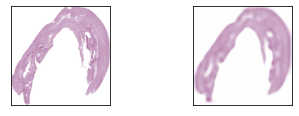

In [17]:
cols = 2
amt = 2
ax = plt.subplot(cols, amt, 1)
img = inp
img = img.detach().cpu().numpy()
plt.imshow(np.transpose(img, (1,2,0))) # changes to rgb
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

ax = plt.subplot(cols,amt, 2)
recon = decoded
print(recon.shape)
recon = recon.detach().cpu().numpy()
plt.imshow(np.transpose(recon, (1,2,0)))
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

print(mse_running_total)

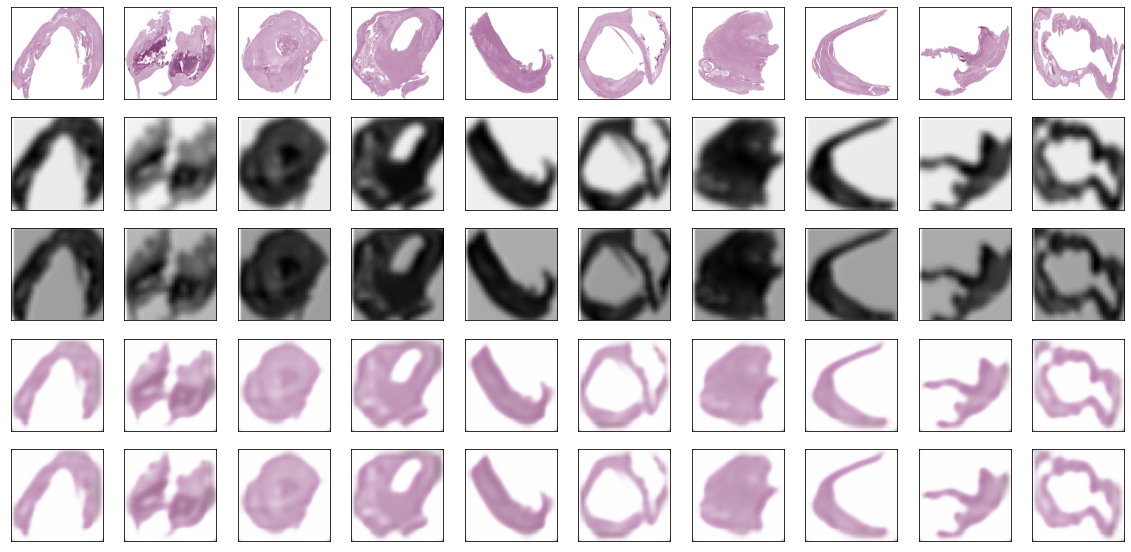

In [8]:
amt = 10
cols = 10
plt.figure(figsize=(20,20))


for k in range(amt):
    
    # input image
    ax = plt.subplot(cols, amt, k+1)
    img = decoded_imgs_arr[k][0]
    img = img.detach().cpu().numpy()
    plt.imshow(np.transpose(img, (1,2,0))) # changes to rgb
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Compressed states
    ax = plt.subplot(cols,amt, k+1+amt)
    plt.gray()
    img = encoded_imgs_arr[k].detach().cpu().numpy()
    conv_filter = 0 # [0, 128)
    plt.imshow(np.transpose(img, (1,2,0))[:,:,conv_filter]) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(cols,amt, k+1+2*amt)
    plt.gray()
    conv_filter = 60 # [0, 128)
    plt.imshow(np.transpose(img, (1,2,0))[:,:,conv_filter]) 
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Output States
    ax = plt.subplot(cols,amt, k+1+3*amt)
    recon = decoded_imgs_arr[k][1]
    recon = recon.detach().cpu().numpy()
    plt.imshow(np.transpose(recon, (1,2,0)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(cols,amt, k+1+4*amt)
    recon = auto_encoder_output[k][1]
    recon = recon.detach().cpu().numpy()
    plt.imshow(np.transpose(recon, (1,2,0)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In [7]:
33*33*64

69696

In [9]:
299*299*3

268203